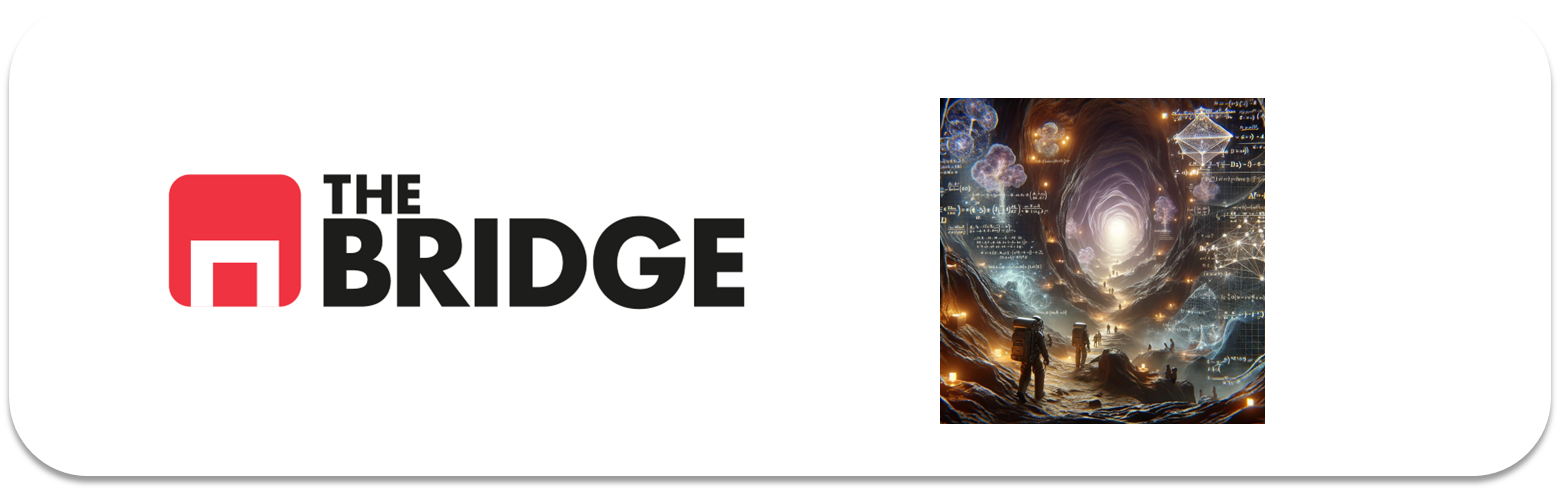

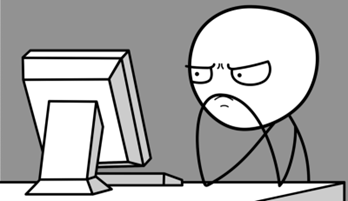

Para ejercitarte y afianzar lo aprendido sobre **Keras y DL**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Predecir eficiencia de gasolina

En este conjuntos de ejercicios vamos a trabajar sobre el set de datos clasico [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) para construir un modelo DL para predecir el consumo de vehiculos de 1970 y 1980. Para hacer esto proveeremos el modelo con una descripcion de muchos automoviles de ese periodo. Esta descripcion incluye atributos como: Cilindros, desplazamiento, potencia y peso.

El objetivo de este ejercicio es predecir el target miles per galon (MPG), que vendría a representar las millas por galón de combustible.

Para la construcción del modelo vamos a utilizar Keras.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [116]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import toolbox_ML as tb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### Ejercicio 1

Carga los datos en un dataframe, utilizando como nombre de columnas los siguientes:

```python
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model Year', 'Origin']
``` 


In [141]:
df = pd.read_csv('./data/Autos_data.txt', delim_whitespace=True, names=['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model Year', 'Origin'])

C:\Users\sorim\AppData\Local\Temp\ipykernel_308\3465847969.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('./data/Autos_data.txt', delim_whitespace=True, names=['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model Year', 'Origin'])


In [142]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


### Ejercicio 2: Limpieza inicial

Echa un primer vistazo. Limpia columnas "raras". Deshazte de nulos (cuidado aquí), arregla el tipo de las features numéricas si fuera necesario. Haz una lista de las features categóricas que tuvieramos que convertir posteriormente. (Es antes del split pero no importa para este ejercicio)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 18.0 to 31.0
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    int64  
 1   Cylinders     398 non-null    float64
 2   Displacement  398 non-null    object 
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    int64  
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 28.0+ KB


In [120]:
# No veo nulos

In [143]:
tb.describe_df(df)

,COL_N,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,DATA_TYPE,int64,float64,object,float64,float64,int64,int64,object
1,MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,UNIQUE_VALUES,5,82,94,351,95,13,3,305
3,CARDIN (%),1.26,20.6,23.62,88.19,23.87,3.27,0.75,76.63


In [122]:
# Voy a ver porqué Displacement es de tipo object

df['Displacement'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [144]:
# Hay nulos en forma de '?', voy a taparlos como NaN para poder transformarlos
df.loc[df['Displacement'] == '?', 'Displacement'] = np.NaN

In [145]:
df['Displacement'] = df['Displacement'].astype(float)

In [146]:
df[df['Displacement'].isna()]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
25.0,4,98.0,NaN,2046.0,19.0,71,1,ford pinto
21.0,6,200.0,NaN,2875.0,17.0,74,1,ford maverick
40.9,4,85.0,NaN,1835.0,17.3,80,2,renault lecar deluxe
23.6,4,140.0,NaN,2905.0,14.3,80,1,ford mustang cobra
34.5,4,100.0,NaN,2320.0,15.8,81,2,renault 18i
23.0,4,151.0,NaN,3035.0,20.5,82,1,amc concord dl


In [147]:
df['Displacement'].describe()

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: Displacement, dtype: float64

In [148]:
# Voy a imputar la mediana para los valores nulos
df['Displacement'].fillna(df['Displacement'].median(), inplace=True)

C:\Users\sorim\AppData\Local\Temp\ipykernel_308\1969114511.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Displacement'].fillna(df['Displacement'].median(), inplace=True)


In [149]:
df['Displacement'].isnull().sum()

0

In [155]:
target = 'MPG'
features_cat = ['Acceleration', 'Model Year']
features_num = [col for col in df.columns if col not in features_cat and col != target and col != 'Origin'] # Deshecho la ultima variable porque no voy a realizar NPL
features_num

['Cylinders', 'Displacement', 'Horsepower', 'Weight']

### Ejercicio 3

Antes de seguir nos informan que las etiquetas de "origin" correspoden a  USA para el 1, Europa para el 2 y Japón para el 3. Convierte origin a esos valores porque queremos tener el literal. Luego haz directamente un one-hot encoding de esas variable.  

*NOTA: Realmente los one-hot-encoding se pueden hacer contra el dataset original desde el principio (no afectan unos a otros), si nos los hacemos es porque hasta que no se han analizado las variables puede que no tengamos claro que queremos hacer si una codificación ordinal, una vectorización (onehot) o bien queremos hacer otro cambio en la variable y esos vienen dados por la relación de la categórica con el target y por tanto sólo se pueden ver en el train. Pero si por lo que sea sabemos seguros que vamos a hacer vectorización no hay problema en hacerlo antes del split. Por otro lado, siempre conviene quedarse con una categoria unkown para valores que pueden llegar en el futuro antes de un recalibrado.*


In [156]:
df['Origin'].unique()

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'ford pinto', 'plymouth satellite custom', 'ford torino 500',
       'amc matador', 'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900'

In [157]:
# Clasifico las marcas de los coches por el pais de origen y lo sustituyo por los paises
usa = ['chevrolet', 'buick', 'amc', 'ford', 'pontiac', 'dodge', 'chevy', 'hi', 'oldsmobile', 'chrysler', 'cadillac', 'chevroelt']
for valor in df['Origin']:
    for modelo in usa:
        if modelo in valor:
            df.loc[df['Origin'] == valor, 'Origin'] = 'USA'
        else:
            continue   

europa = ['plymouth', 'volkswagen', 'vokswagen', 'vw', 'peugeot', 'audi', 'saab', 'bmw', 'mercury', 'opel', 'fiat', 'volvo', 'renault', 'saab', 'capri', 'mercedes', 'triumph']
for valor in df['Origin']:
    for modelo in europa:
        if modelo in valor:
            df.loc[df['Origin'] == valor, 'Origin'] = 'Europa'
        else:
            continue  

japon = ['toyota', 'toyouta' , 'datsun', 'mazda', 'maxda', 'honda', 'subaru', 'nissan']
for valor in df['Origin']:
    for modelo in japon:
        if modelo in valor:
            df.loc[df['Origin'] == valor, 'Origin'] = 'Japon'
        else:
            continue 

In [158]:
# Compruebo si esta todo bien
df['Origin'].value_counts()

Origin
USA       207
Europa    112
Japon      79
Name: count, dtype: int64

In [159]:
df = pd.get_dummies(df, columns=['Origin'], dtype=int)

In [160]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_Europa,Origin_Japon,Origin_USA
18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0,1
15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0,1
18.0,8,318.0,150.0,3436.0,11.0,70,1,1,0,0
16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0,1
17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0,1


In [161]:
# Realizo en One-Hot
for col in df.columns[df.columns.str.startswith('Origin')]:
    features_cat.append(col)
features_cat

['Acceleration', 'Model Year', 'Origin_Europa', 'Origin_Japon', 'Origin_USA']

### Ejercicio 4

Divide los datos en train y test. Ahora divida el set de datos en un set de entrenamiento y otro de pruebas. 80% para entrenamiento

Usaremos el set de pruebas en la evaluacion final de nuestro modelo. Emplea una variable target para guardar el nombre de la columna target.

NOTA: El resultado tienen que ser dos datasets

In [162]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [163]:
print(len(df))
print(len(train_set))
print(len(test_set))

398
318
80


### Ejercicio 5

Inspecciona los datos. Revisa rápidamente la distribución conjunta del dataset de entrenamiento mediante un grid de gráficos

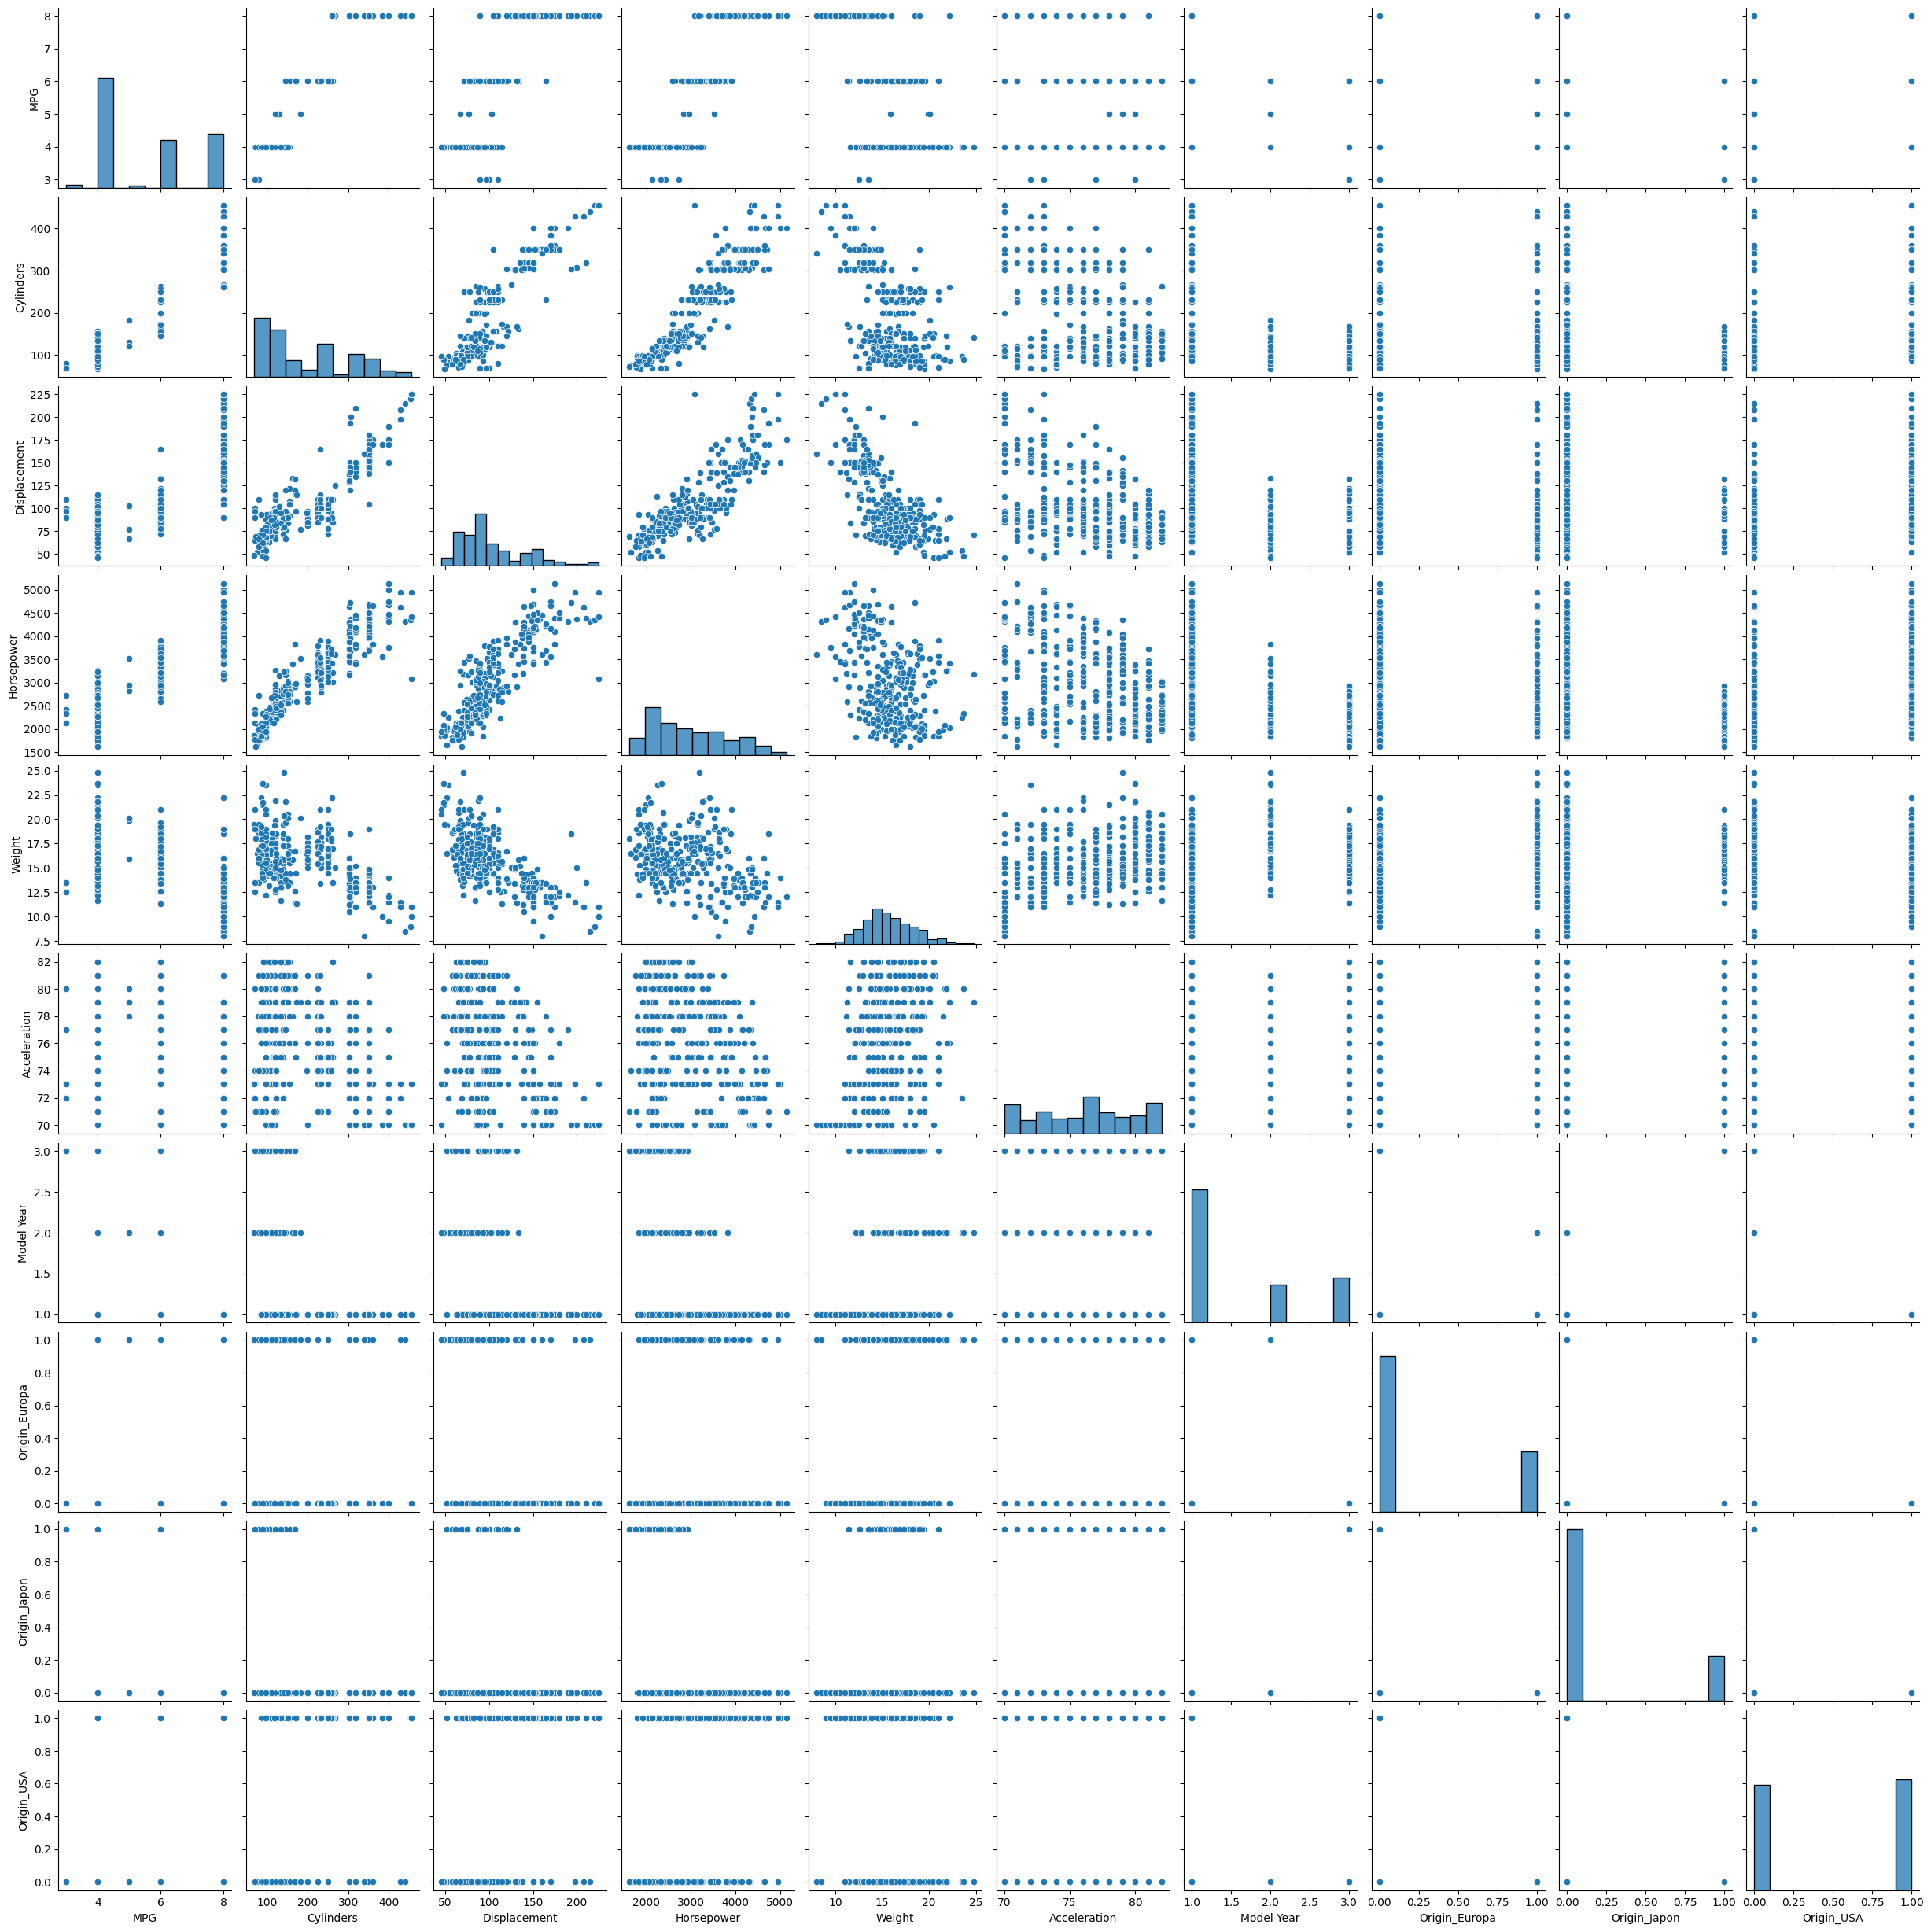

In [138]:
sns.pairplot(train_set);

In [139]:
# Se diferencia cuales son las categoricas y, ademas, puedo observar que algunas variables pueden tener colinealidad con otras

### Ejercicio 6 

Independientemente de lo que hayas encontrado en el análisis anterior, vamos a utilizar todas las features y antes las vamos a escalar. Estandardiza train y test.

In [164]:
features_all = []
for col1,col2 in zip(features_num, features_cat):
    features_all.append(col1)
    if not col2.startswith('Origin'):
        features_all.append(col2)

features_all

['Cylinders',
 'Acceleration',
 'Displacement',
 'Model Year',
 'Horsepower',
 'Weight']

In [165]:
# Como tengo las colimnas 'Origin_' con 0s y 1s voy a realizar un MinMaxScaler mejor para que sea acorde a esa distribucion
scaler = MinMaxScaler(feature_range=(0,1))
train_set[features_all] = scaler.fit_transform(train_set[features_all])


In [166]:
test_set[features_all] = scaler.transform(test_set[features_all])

In [168]:
# Creo las parejas X,y
X_train = train_set[features_num + features_cat]
X_test = test_set[features_num + features_cat]

y_train = train_set[target]
y_test = test_set[target]


## El modelo

### Ejercicio 7: Construye el modelo con Keras

Construyamos nuestro modelo. Aquí, utilizaremos un modelo `secuencial` con dos capas ocultas densamente conectadas y una capa de salida que devuelve un único valor continuo. Es decir una MLP con dos capas ocultas.

Por tanto, tendrá tres capas. Una inicial con activación relu (usa el argumento `input_shape` para darle el número de features). Otra hidden layer con activación relu y la de salida de regresión, que se compondrá de una única neurona. Pon las neuronas que consideres interesantes para las dos primeras capas (NOTA: En este caso partimos de pocas features, por lo que puede ser interesante poner 2 o 3 como mínimo el número de features para poder obtener unas pseudofeatures que intenten capturar las interrelaciones.)

Otros datos:

Para el compile utiliza un loss='mse'.

optimizer = `tf.keras.optimizers.RMSprop(0.001)`

Y en metrics añade en una lista el `mae` y `mse`.

Utiliza una aproximación en prisma (mismo numero de unidades en las capas ocultas)

In [109]:
len(train_set.columns)

10

In [170]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(units=9, activation= 'relu', input_shape=(9,)))
model.add(keras.layers.Dense(units=32, activation='relu'))
model.add(keras.layers.Dense(units=1))

model.compile(optimizer = tf.keras.optimizers.RMSprop(0.001), loss = 'mse', metrics=['mae', 'mse'])

c:\Users\sorim\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Ejercicio 8

Inspecciona el modelo usando el método `.summary` para imprimir una descripción simple del modelo

In [171]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 9)              │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 443 (1.73 KB)

 Trainable params: 443 (1.73 KB)

 Non-trainable params: 0 (0.00 B)

### Ejercicio 9 Entrenar el modelo

Entrena el modelo para 1000 epochs y guarda los resultados del entrenamiento en una variable llamada `history`.
Emplea en el entrenamiento un 20% de los datos para validación, mediante el argumento `validation_split`.

In [172]:
history = model.fit(
    X_train,
    y_train,
    epochs = 1000,
    validation_split=0.2
)

Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 35.0923 - mae: 5.6916 - mse: 35.0923 - val_loss: 30.3721 - val_mae: 5.2681 - val_mse: 30.3721
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 31.6950 - mae: 5.3939 - mse: 31.6950 - val_loss: 29.2857 - val_mae: 5.1596 - val_mse: 29.2857
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 29.3816 - mae: 5.1866 - mse: 29.3816 - val_loss: 28.2874 - val_mae: 5.0581 - val_mse: 28.2874
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 30.5726 - mae: 5.2778 - mse: 30.5726 - val_loss: 27.2936 - val_mae: 4.9563 - val_mse: 27.2936
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 30.8856 - mae: 5.2963 - mse: 30.8856 - val_loss: 26.2729 - val_mae: 4.8497 - val_mse: 26.2729
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 28.8685 - mae: 5.1067 - mse: 28.8685 - val_loss: 25.1624 - val_mae: 4.7317 - val_mse: 25.1624
Epoch 7/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 28.0363 - mae: 5.0234 - ms

### Ejercicio 10

Visualiza el progreso de entrenamiento del modelo usando las estadísticas almacenadas en el objeto `history`. Muestra la evolución del error en train y validation por un lado, y la evolución de la pérdida (loss), también train contra validation, en otra.

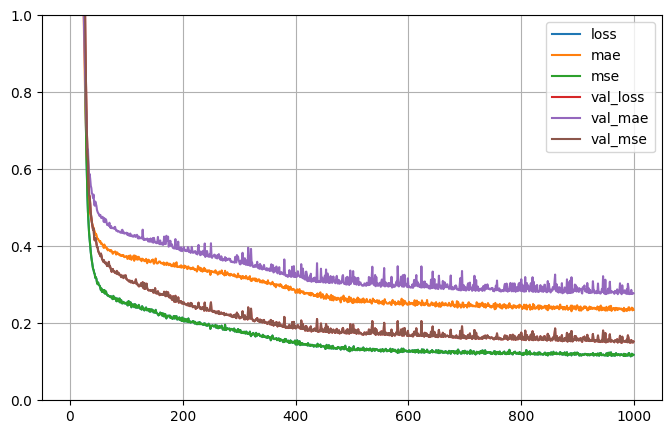

In [177]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

### Ejercicio 11

Comenta las gráficas anteriores.

In [ ]:
# En general, tanto la perdida como las metricas empiezan arriba y van subiendo hasta que llegan a ser constantes.
# Pero se puede observar distorsiones, es decir, que cuando bajan, suben ligeramente y vuelven a bajar.
# No veo la perdida, por mucho que ajusto la grafica no la encuentro

### Ejercicio 12

Independientemente de lo comentado en 11, vamos a añadir un callback al entrenamiento. Para ello, construye el modelo otra vez y vuelve a compilarlo (si no lo haces, como ya sabes comenzará el entrenamiento donde lo dejó y no nos valdrá el callback para nada). Entrena el modelo con los mismos hiperparámetros del ejercicio 10 y pinta la gráfica de evolución de los errores e interprétalo (obten el MAE medio una vez "estabilizado" el entrenamiento).  

Para el earlystopping utiliza un margen de 20 epochs.

In [178]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(units=9, activation= 'relu', input_shape=(9,)))
model.add(keras.layers.Dense(units=32, activation='relu'))
model.add(keras.layers.Dense(units=1))

model.compile(optimizer = tf.keras.optimizers.RMSprop(0.001), loss = 'mse', metrics=['mae', 'mse'])

early_stopping = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True, monitor='val_loss') # Lo he puesto sobre las perdida de val

history = model.fit(X_train, y_train, 
                    epochs=1000, 
                    validation_split=0.2, 
                    callbacks=[early_stopping])

Epoch 1/1000


c:\Users\sorim\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 35.5810 - mae: 5.7179 - mse: 35.5810 - val_loss: 30.9800 - val_mae: 5.3040 - val_mse: 30.9800
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 30.9558 - mae: 5.3243 - mse: 30.9558 - val_loss: 28.8109 - val_mae: 5.0975 - val_mse: 28.8109
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 31.1470 - mae: 5.3225 - mse: 31.1470 - val_loss: 26.9117 - val_mae: 4.9084 - val_mse: 26.9117
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 29.1287 - mae: 5.1346 - mse: 29.1287 - val_loss: 24.9918 - val_mae: 4.7108 - val_mse: 24.9918
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 26.4665 - mae: 4.8606 - mse: 26.4665 - val_loss: 22.9940 - val_mae: 4.4974 - val_mse: 22.9940
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 24.2997 - mae: 4.6470 - mse: 24.2997 - val_loss: 20.9090 - val_mae: 4.2651 - val_mse: 20.9090
Epoch 7/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.4321 - mae: 4.4449 - mse: 22.4321 - v

In [187]:
# Se ha parado en la epoca 742
# Para calcular el MAE medio de las epocas estabilizadas voy a obtener su historial:
val_mae_history = history.history['val_mae']
best_epoch = val_mae_history.index(min(val_mae_history)) # Veo el indice que es la epoca del valor minimo de MAE
mae_medio = sum(val_mae_history[:best_epoch]) / (best_epoch) # Calculo la media sumando todos los valores MAE hasta la epoca con menor MAE

print(f'MAE medio en las mejores epochs (hasta epoch {best_epoch}): {mae_medio:.4f}')

MAE medio en las mejores epochs (hasta epoch 710): 0.4704


Interpreta el gráfico

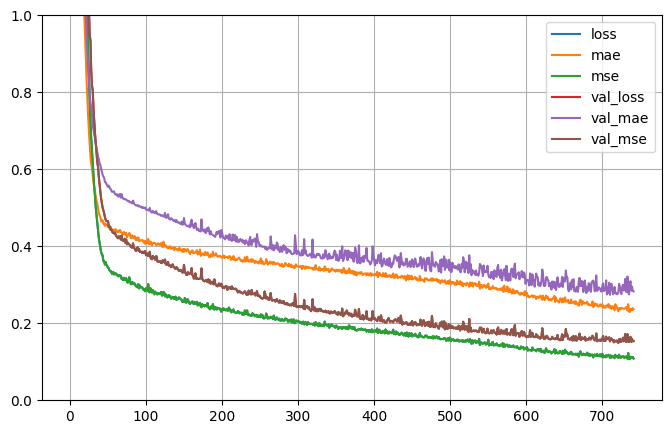

In [186]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
# Como llega las epocas hasta el 742, no se ve una estabilizacion de las metricas como antes pero han pasado 20 epocas subiendo la perdida por lo que le programa ha decidido interrumpir 
# teniendo en cuentra nuestro callback

### Ejercicio 13

Veamos qué tan bien generaliza el modelo al usar el conjunto de **test**. Esto nos dice qué tan bien podemos esperar que el modelo prediga cuándo lo usamos en el mundo real. Utiliza el método `evaluate` con los datos de test normalizados y sus labels.

Con el método evaluate devolverá tres valores: loss, mae y mse.

In [188]:
metrics_test = model.evaluate(X_test, y_test)
metrics_test

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2042 - mae: 0.3091 - mse: 0.2042  


[0.22105488181114197, 0.3202572464942932, 0.22105488181114197]

### Ejercicio 14

Dibuja en un scatter plot las predicciones de test vs sus true labels.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


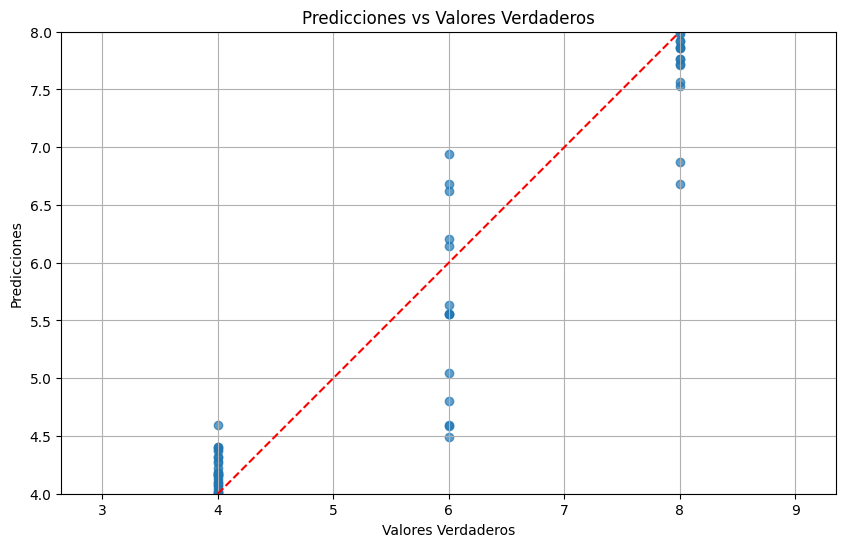

In [189]:
y_pred = model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea de referencia
plt.title('Predicciones vs Valores Verdaderos')
plt.xlabel('Valores Verdaderos')
plt.ylabel('Predicciones')
plt.grid()
plt.axis('equal')  # Asegura que los ejes tengan la misma escala
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.show()